## Instruciones Generales:

### Código

- Cuando aparezca esta imagen en el notebook, encontrará código Python que puede ser intermedio o avanzado. 

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python

<br/><br/>

  - **Esta sección es opcional**.
  - Concéntrense en los conceptos que se están tratando. 
  - Cuando se sienta cómodo con Python estudie el código. 

### Actividades

- Cuando aparezca esta imagen en el notebook, encontrará instrucciones de las actividades a realizar de forma autónoma para reforzar los temas tratados. 

<img align="left" width="60px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/homework.png">

<br/>

### Actividad

<br/>


# Estadística inferencial

- Hemos presentado conceptos de distribución de una variable aleatoria (v.a.) tanto para el caso discreto como continuo. 
  - En nuestros ejemplos siempre hemos conocido los parámetros de nuestra distribución.

- Cuando observamos un sistema, tenemos acceso a una muestra finita (subconjunto), $x_1, x_2, \dots, x_n$ de la población, $X\sim N(\mu, \sigma)$. 
  - En la mayoría de los casos, desconocemos la distribución de la población y sus parámetros $X\sim N(\mu, \sigma)$.

- **La estadística inferencial** se encarga de inferir información acerca de los parámetros poblacionales, ej. $\mu, \sigma$, a partir de la muestra observada. 

- Por ejemplo la media muestral $\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i$ es un **estimador puntual** de la media poblacional $\mu$.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/sample.png" alt="" width="500" />

### Estimación puntual

- **Definición:**

  - Sea $X$ una variable aleatoria (población) cuya distribución $f_X(x)$ depende de un parámetro $\theta$
desconocido. 
- Un estimador del parámetro $\theta$ es un **estadístico** $\hat{\theta} = T(X_1, X_2, \dots, X_n)$ que se utiliza para estimar el valor de dicho parámetro, con base en los valores observados de la muestra aleatoria.

- Criterios para la selección de un estimador:
1. Que sea centrado (no sesgado), es decir, que $E[\hat{\theta}] = \theta$.
2. De mínima varianza, en el sentido que si \hat{\theta_1} y \hat{\theta_2} son estimadores centrados de $\theta$, se considera mejor aquel de menor varianza.
3. Es deseable que sea lineal respecto a las variables de la muestra.

### Ejemplo:

- Sea $X_1, X_2, \dots X_n$ una muestra aleatoria de una v.a. $X$, con media $\mu$ y 
varianza $\sigma^2$ (parámetros desconocidos).
- Entonces:
$$\hat{\mu} = \bar{X} = \frac{1}{n} \sum_{i=1}^n x_i$$
y 
$$\hat{\sigma^2} = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{X})^2$$
son estimadores puntuales de la media $\mu$ y la
varianza $\sigma^2$ poblacionales, respectivamente.

- **Estimadores de la media poblacional: media muestral $\bar{X}$ vs. mediana de la muestra.**

  1. Vamos a generar una muestra aleatoria a partir de una distribución uniforme estándar:
  $$X\sim U(a, b), a=0, b=1.$$
    - La muestra tiene tamaño n=30. 
  2. A partir de la muestra vamos a calcular la media muestral $\bar{X}$. 
  3. Repetimos 1 y 2 un número dado de veces **size = 100000**.
  4. Construiremos un gráfico de densidad con las **size = 100000** observaciones (cálculos) que hicimos de la media muestral $\bar{X}$. 
    - Note que $\bar{X}$ es una v.a. 

- Repetimos el proceso anterior, pero en lugar de calcular el gráfico de densidad para la media muestral $\bar{X}$, lo haremos para la mediana de la muestra. 

- Conocemos la distribución de origen $X\sim U(a, b), a=0, b=1$, podemos calcular por tanto la media poblacional y usar como referencia, para observar si las curvas están centradas alrededor de $\mu$:
$$\mu = \frac{1}{2} (a+b)$$

  - Vea: https://en.wikipedia.org/wiki/Continuous_uniform_distribution

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python


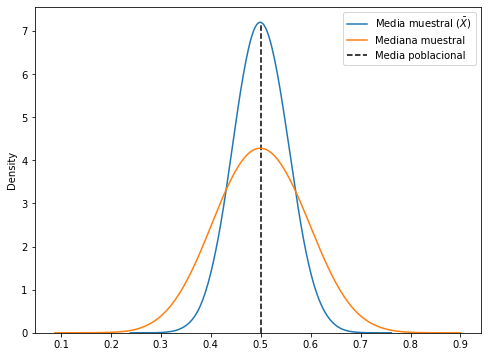

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform

# fijamos una semilla para tener reproducibilidad de los resultados
np.random.seed(123)

size = 100000  # repeticiones de la simulación
n = 30  # tamaño de muestra

# parámetros de la distribución uniforme
a = 0
b = 1

U = uniform.rvs(a, b-a, size=(size,n))  # v.a. uniforme X \sim U(0,1)
# Vea la media y varianza: https://en.wikipedia.org/wiki/Continuous_uniform_distribution
mu = 1/2 * (a + b)

Umean = U.mean(axis=1)
Umedian = np.median(U, axis=1)

plt.figure(figsize=(8,6))
sns.kdeplot(Umean, label=r"Media muestral ($\bar{X}$)", bw_adjust=3)
sns.kdeplot(Umedian, label="Mediana muestral", bw_adjust=3)
plt.vlines(mu, 0, 7.2, linestyles="dashed", label="Media poblacional")
l = plt.legend()

- Podemos observar en la figura arriba que tanto la media (curva azul) como la mediana (curva naranaja) de la muestra están centradas alrededor de la media poblacional $\mu = \frac{1}{2} (a+b)$ representada por la línea punteada.
  - Sin embargo la media muestral $\bar{X}$, es el estimador de mínima varianza. 
  
- Podemos apreciar que $E[\bar{X}] \approx \mu$, tal como esperamos para un estimador que sea centrado (no sesgado), decir, que $E[\hat{\theta}] = \theta$.

- **Observemos dos estimadores para la varianza poblacional:**

  - Estimador de máxima verosimilitud: $$\hat{\sigma^2} = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{X})^2.$$
  - Estimador no sesgado: $$\hat{\sigma^2} = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{X})^2.$$
  
- Vamos a repetir el proceso que implementamos para la media y la mediana, esta vez para los 2 estimadores definidos arriba.  

- Conocemos la distribución de origen $X\sim U(a, b), a=0, b=1$, podemos calcular por tanto la varianza de la población y usarla como referencia, para observar si las curvas están centradas alrededor de $\mu$:
$$\sigma^2 = \frac{1}{12} (b-a)^2.$$
  - Vea: https://en.wikipedia.org/wiki/Continuous_uniform_distribution

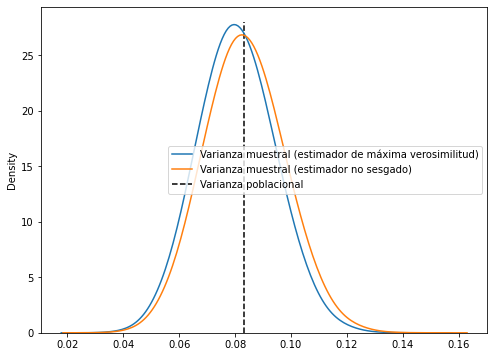

In [22]:
size = 100000  # repeticiones de la simulación
n = 30  # tamaño de muestra

# parámetros de la distribución uniforme
a = 0
b = 1

U = uniform.rvs(a, b-a, size=(size,n))  # v.a. uniforme X \sim U(0,1)

Uvar_mv = np.var(U, axis=1)  # estimador de máxima verosimilitud
Uvar_ns = np.var(U, axis=1, ddof=1)  # estimador centrado

plt.figure(figsize=(8,6))
sns.kdeplot(Uvar_mv, label=r"Varianza muestral (estimador de máxima verosimilitud)", bw_adjust=3)
sns.kdeplot(Uvar_ns, label="Varianza muestral (estimador no sesgado)", bw_adjust=3)
plt.vlines(sigma2, 0, 28, linestyles="dashed", label="Varianza poblacional")
l = plt.legend()

- Podemos observar que el estimador de máxima verosimilitud (curva azul) es sesgado con respecto a la varianza poblacional $\sigma^2 = \frac{1}{12} (b-a)^2$. 
  - Este debe corregirse para poder tener un estimador centrado (curva naranja). 
- Note que el estimador de máxima verosimilitud tiene en el denominador $n$ mientras que el estimador no sesgado divide por $n-1$, es decir el estimador de máxima verosimilitud divide por un valor más grande, por tanto subestima el valor de la varianza poblacional, y la curva azul está sesgada a la izquierda. 
    - ¿Qué ocurre para $n \rightarrow \infty$?

# Estimación por intervalos

- Más útil que dar una **estimación puntual** del parámetro poblacional, es dar una estimación por intervalo. 
  - Esto lo conocemos como un **intervalo de confianza** para el parámetro del que estamos infiriendo información. 
  
- Vamos a presentar algunos conceptos que nos serán útiles para entender algunos de los estadísticos utilizados para construir **intervalos de confianza** y **pruebas de hipótesis** acerca de los parámetros poblacionales. 

## Función generatriz de momentos (FGM)

$$
M_X(t) = E[e^{tX}]= \left\{
                \begin{array}{ll}
                  \sum_{R(X)} g_X(x)  e^{tx},\ X \text{: va. discreta,} \\
                  \int_{R(X)} [f_X(x)  e^{tx}] dx,\ X \text{: v.a. continua.}
                \end{array}
              \right.
$$

Usando el FGM, podemos obtener los momentos de la variable aleatoria $X$, $E[X^n]$, derivando la función $n$ veces y evaluando $t=0$.

$$
E[X] = M_x'(t=0)
$$

$$
E[X^2] = M_x''(t=0)
$$

$$
E[X^n] = M_x^n(t=0)
$$

Por lo tanto, podemos usar el FGM para calcular el valor esperado y la varianza de $X$.

### La FGM determina la distribución

La FGM de una variable aleatoria determina su distribución: si dos v.a.s. tienen la misma FGM, deben tener
la misma distribución.

### Suma de variables aleatorias independientes

Si $X$ y $Y$ son independientes,
entonces la FGM de $X + Y$ es el producto de las FGM individuales:

$$
M_X+Y(t) = M_X(t)M_Y(t).
$$

Esto es cierto porque si $X$ y $Y$ son independientes, entonces $E[e^{t(X+Y)}] = E[e^{tX}]E[e^{tY}]$.

Podemos extender esto a $n$ variables:

$$W = X_1 + X_n + \cdots + X_n,$$ entonces

$$
M_W(t) = E[e^{tW}] = E[e^{t(X_1+X_2+\cdots + X_n)}] = E[e^{tX_1}]E[e^{tX_2}] \cdots E[e^{tX_n}]
$$

$$
M_W(t) = M_{X_1}(t) M_{X_2}(t) \dots M_{X_n}(t) 
$$

### Suma de variables aleatorias normales independientes

Si tenemos una colección de v.a.s. normales independientes. $X_1 + X_2 + \cdots + X_n$, con $X_i \sim N(\mu_i, \sigma_i^2)$. Entonces la distribución de $W = X_1 + X_n + \cdots + X_n$, es


$$
W \sim \mathcal{N} \left(\sum \mu_i, \sum \sigma_i^2 \right).
$$


**Demostración**

La función generadora de momentos de una variable aleatoria $X \sim N(\mu, \sigma^2)$ es $M_X(t) = e^{t \mu + 1/2 \sigma^2 t^2}$.

$$
M_W(t) = M_{X_1}(t) M_{X_2}(t) \dots M_{X_n}(t) 
$$

$$
M_W(t) = [e^{t \mu_1 + 1/2 \sigma_1^2 t^2}] [e^{t \mu_2 + 1/2 \sigma_2^2 t^2}] \cdots [e^{t \mu_n + 1/2 \sigma_n^2 t^2}]
$$ 

$$
M_W(t) = e^{t(\mu_1 + \mu_2 + \cdots + \mu_n) + 1/2 t^2 (\sigma_1^2 + \sigma_2^2 + \cdots + \sigma_n^2) }
$$

La última expresión corresponde a la FGM de una distribución normal, y dado que la FGM determina la distribución, tenemos que
$$W \sim N (\mu_1 + \mu_2 + \cdots + \mu_n, \sigma_1^2 + \sigma_2^2 + \cdots + \sigma_n^2).$$

En general si $W = \sum a_i X_i$, tenemos:

$$
W \sim \mathcal{N} \left(\sum a_i \mu_i, \sum a_i^2 \sigma_i^2 \right).
$$

### Teorema del límite central

Si tenemos una colección de v.a.s. normales i.i.d. $X_1 + X_2 + \cdots + X_n$, con $X_i \sim N(\mu, \sigma^2)$.

Entonces para $n$ lo suficientemente grande tenemos:

$$
\sum X_i \sim N(n \mu, n \sigma^2) \Rightarrow \frac{\sum X_i - n \mu}{\sigma \sqrt{n}} \sim N(0,1)
$$

$$
\bar{X} = \frac{\sum X_i}{n}  \sim N(\mu, \sigma^2 / n) \Rightarrow \frac{\bar{X} - \mu}{ \sigma / \sqrt{n}} \sim N(0,1)
$$

- En este punto conocemos ya la distribución que tiene la media muestral $\bar{X}$.
  - Esto nos será útil para inferir información acerca de la media poblacional $\mu$ usando el estimador $\bar{X}$.
- La distribución normal es una distribución importante por su relación con el teorema del límite central. 

### Distribución de algunos estadísticos importantes

Si $X$ y $Y$ son dos variable aleatorias distribuidas como
$$
X \sim \mathcal{N}\left(\mu_X, \sigma_X^2\right) \textrm{ y } 
Y \sim \mathcal{N}\left(\mu_Y, \sigma_Y^2\right),
$$ 
y se seleccionan dos muestras aleatorias 
$X_1,X_2,\dots,X_n$ y $Y_1,Y_2,\dots,Y_m$, 
determine la distribución de probabilidad de 
los siguientes estadísticos (marcados en negrita):

---
---

\begin{equation}
    \boldsymbol{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}} \sim \mathcal{N}(0,1).\quad (1)
\end{equation}

Sabemos que v.a. $\bar{X}$ (media muestral)
está distribuida como $\bar{X}\sim \mathcal{N}\left(\mu_X, \frac{\sigma_X^2}{n}\right)$.
Al normalizar para parámetros conocidos de la población,
es decir, restar la media $\mu$ y dividir por la desviación 
$\sqrt{\frac{\sigma_X^2}{n}}$, tenemos la expresión en la Ec. (1).

---
---

\begin{equation}
    \boldsymbol{(n-1)\frac{S_X^2}{\sigma_X^2}} \sim \chi^2_{(n-1)}.\quad (2)
\end{equation}

$$
\sum_{i=1}^n(X_i - \mu)^2  = \sum_{i=1}^n[(X_i - \bar{X}) + (\bar{X} - \mu)]^2
$$
$$
 = \sum_{i=1}^n(X_i - \bar{X})^2 + \sum_{i=1}^n(\bar{X} - \mu)^2 + 2(\bar{X} - \mu)\sum_{i=1}^n(X_i - \bar{X})
$$
$$
 = \sum_{i=1}^n(X_i - \bar{X})^2 + n(\bar{X} - \mu)^2
$$

Partimos de sumar y restar $\bar{X}$, es decir hemos suamdo cero,
por lo que ambas expresiones de la igualdad son equivalentes.
Luego descomponemos la expresión resultante como se muestra en la segunda línea.
El término $\sum_{i=1}^n(X_i - \bar{X})$ es igual a cero, 
y la sumatoria en el segundo término es una suma constante,
por lo tanto es igual a $n$ veces $(\bar{X} - \mu)^2$. 
Partimos de la expresión obtenida arriba, 
$$
\sum_{i=1}^n(X_i - \mu)^2 
 = \sum_{i=1}^n(X_i - \bar{X})^2 + n(\bar{X} - \mu)^2.
$$
dividimos 
cada término de la igualdad entre $\sigma^2$ y 
sustituimos $\sum_{i=1}^n(X_i - \bar{X})^2$ por $(n - 1)S^2$.
Esto último proviene de despejar de la definición
del estimador insesgado de la varianza
muestral $S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X})^2$.

El resulado es:

$$
\frac{1}{\sigma^2}\sum_{i=1}^n(X_i - \mu)^2 = 
\frac{(n - 1)S^2}{\sigma^2} + 
\frac{(\bar{X} - \mu)^2}{\sigma^2/n}.
$$

Note que el término en rojo está distribuido como
$\frac{1}{\sigma^2}\sum_{i=1}^n(X_i - \mu)^2 \sim \chi^2_{(n)}$.
El término en verde está distribuido como 
$\frac{(\bar{X} - \mu)^2}{\sigma^2/n} \sim \chi^2_{(1)}$.
Recuerde que $Z_1^2 + Z_2^2 + \dots + Z_n^2 \sim \chi^2_{(n)}$, donde $Z\sim \mathcal{N}(0,1)$.
Sabemos que $W = \sum_{i=1}^n W_i = \chi^2_{(\sum \nu_i)}$, con $W_i \sim \chi^2_{(\nu_i)}$, 
por tanto al despejar $\frac{(n - 1)S^2}{\sigma^2}$ resulta la expresión en la Ec. (2).

---
---

\begin{equation}
    \boldsymbol{\frac{\bar{X}-\mu_X}{S_X/\sqrt{n}}} \sim t_{(n-1)}.\quad (3)
\end{equation}

Tenemos que 
$$
U=(n-1)\frac{S_X^2}{\sigma_X^2} \sim \chi^2_{(\nu=n-1)},\quad 
Z=\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n} \sim \mathcal{N}(0,1).
$$
Usando la definición de la variable aleatoria 
$$T=\frac{Z}{\sqrt{U/\nu}}\sim t_{\nu},$$
donde $\nu$ son los grados de libertad de la distribución,
comprobamos la expresión de la Ec. (3) a continuación:

$$
T=\frac{Z}{\sqrt{U/\nu}} \\
=\frac{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}}{\sqrt{\frac{(n-1)\frac{S_X^2}{\sigma_X^2}}{n-1}}}
=\frac{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}}{\sqrt{\frac{S_X^2}{\sigma_X^2}}}
=\frac{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}}{\frac{S_X}{\sigma_X}}
$$

$$
=\frac{\bar{X} - \mu_X}{S_X / \sqrt n} \sim t_{(n-1)}.
$$

---
---

\begin{equation}
    \boldsymbol{\frac{S_Y^2 \sigma_X^2}{S_X^2 \sigma_Y^2}}
    \sim F_{(\omega=m-1, \nu=n-1)}.\quad (4)
    \end{equation}

Tenemos que 
$$
U=(m-1)\frac{S_Y^2}{\sigma_Y^2} \sim \chi^2_{(\omega=m-1)},\
V=(n-1)\frac{S_X^2}{\sigma_X^2} \sim \chi^2_{(\nu=n-1)}.
$$
De la definición de la v.a. $W = \frac{U/\omega}{V/\nu} \sim F(\omega, \nu)$,
comporbamos la expresión de la Ec. (4):

$$
W = \frac{U/\omega}{V/\nu} 
$$

$$
= \frac{\frac{(m-1)\frac{S_Y^2}{\sigma_Y^2}}{m-1}}
{\frac{(n-1)\frac{S_X^2}{\sigma_X^2}}{n-1}} = 
\frac{\frac{S_Y^2}{\sigma_Y^2}}{\frac{S_X^2}{\sigma_X^2}}
= \frac{S_Y^2 \sigma_X^2}{S_X^2 \sigma_Y^2} \sim F_{(\omega=m-1, \nu=n-1)}.
$$


- Ver __[resumen de fórmulas](https://drive.google.com/open?id=13UyYrWb4MtYr2vJpSnvZWyETH1mW360W)__ para construir intevalos de confianza.

- Ver __[resumen de fórmulas](https://drive.google.com/open?id=1C6Wq9MOQGWNzBwCK8w-DB5NnsY_Mn4Lv)__ para pruebas de hipótesis.

### Simulación de intervalos de confianza

<br/>


<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python



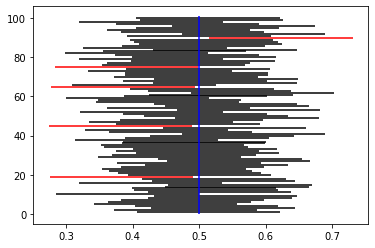

La media poblacional está en el intervalo 95.0 % de las veces.


In [23]:
from scipy.stats import t

size = 100
n = 30

a, b = 0, 1
mu = (a+b)/2
s2 = (b-a)**2 / 12

# fijamos una semilla para tener reproducibilidad de los resultados
np.random.seed(7)

U = uniform.rvs(a, b-a, size=(size,n))  # uniform rvs
Um = np.mean(U, axis=1)  # mean of sample of size n

ICU = Um + t.ppf(0.975, n-1)*np.sqrt(s2 / n)
ICL = Um - t.ppf(0.975, n-1)*np.sqrt(s2 / n)

ci = np.vstack([ICL, ICU]).transpose()
cont = np.where(np.logical_and(ci[:,0]<0.5, ci[:,1]>0.5))[0]

for pos,limits in enumerate(ci):
    if pos in cont:
        col = 'k'
    else:
        col = 'r'
    plt.hlines(pos+1, limits[0], limits[1], colors=col)

plt.vlines(mu, 0, size+1, colors='b')
plt.show()

# Let's count how many times the interval contains the true mean
print("La media poblacional está en el intervalo", np.shape(cont)[0]/size*100, "% de las veces.")

- En la figura arriba, podemos observar 100 repeticiones de la construcción de un intervalo de confianza para la media. 

- Note que arriba hemos realizado un t-test, a partir de una muestra que proviene de una distribución uniforme con un tamaño de muestra $n=30$, estamos violando el supuesto de normalidad de la población. 
  - En el recurso a continuación se discuten los supuestos para la prueba t.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/t_test.png" alt="" width="600" />

  - Vea: https://www.youtube.com/watch?v=U1O4ZFKKD1k

## Estimación de máxima verosimilitud

- Con anterioridad hemos hecho referencia a estimación de máxima verosimilitud, presentamos una breve introducción a continuación. 

- Sources:
    - https://newonlinecourses.science.psu.edu/stat414/node/289/
    - https://newonlinecourses.science.psu.edu/stat414/node/290/